In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Unemployment in India.csv")

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Region   Date   Frequency   Estimated Unemployment Rate (%)  \
0     False  False       False                             False   
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
763    True   True        True                              True   
764    True   True        True                              True   
765    True   True        True                              True   
766    True   True        True                              True   
767    True   True        True                              True   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                     

In [ ]:
data.duplicated().sum()

27

In [ ]:
data = data.drop_duplicates(subset=['Region',' Date',' Frequency',' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)','Area',])

In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


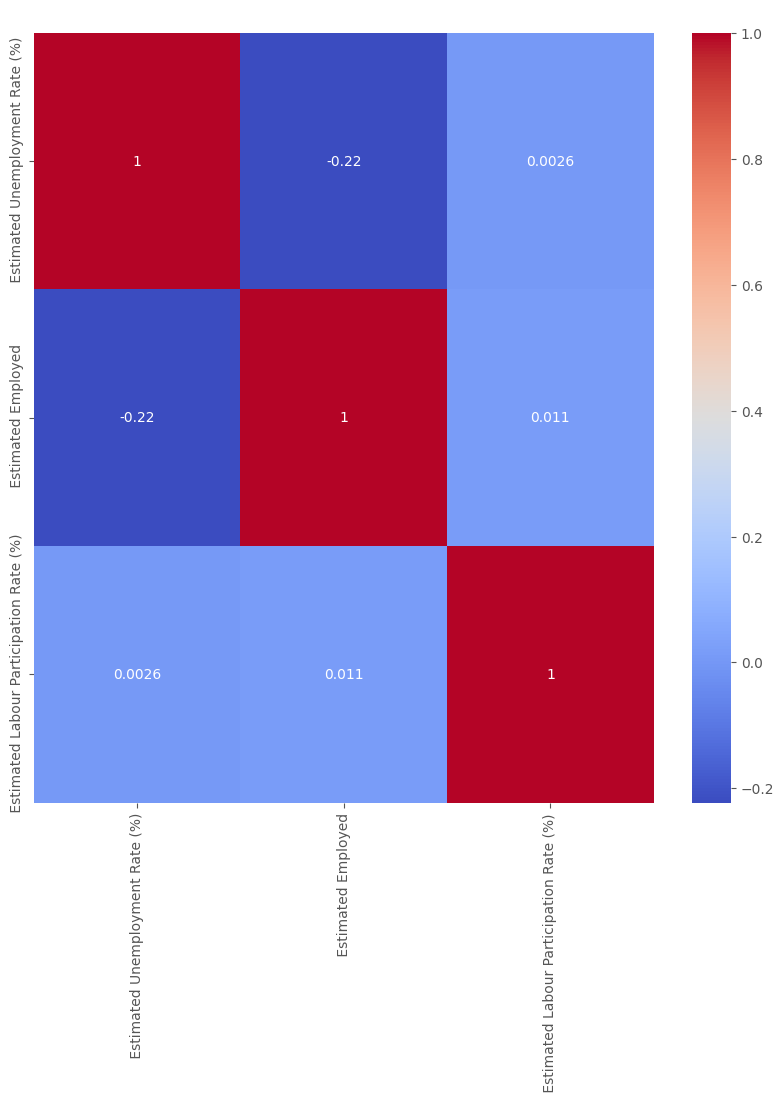

In [ ]:
numeric_data = data.select_dtypes(include='number')
plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

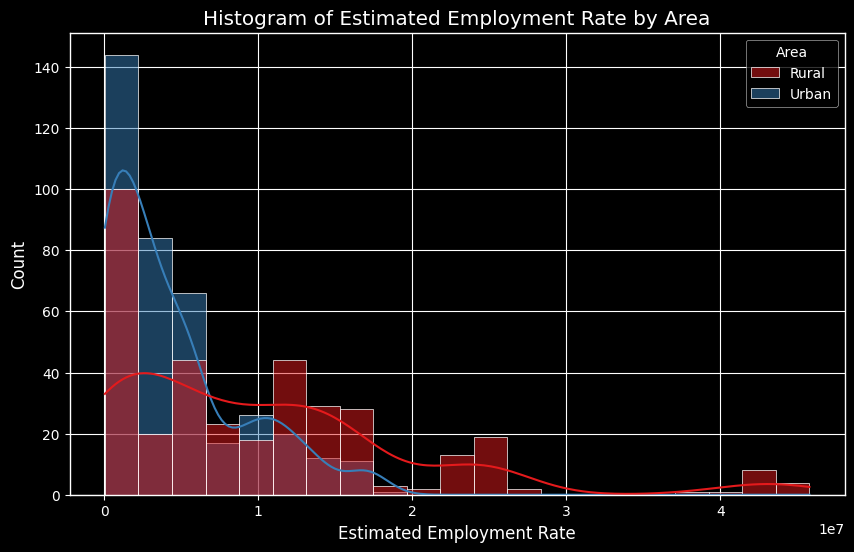

In [ ]:
plt.style.use("dark_background")

data.columns = ["Region", "Date", "Frequency", "Estimated Unemp Rate", "Estimated Emp Rate", "Estimated Labour Rate", "Area"]

plt.figure(figsize=(10, 6))
sns.histplot(x="Estimated Emp Rate", hue="Area", data=data, kde=True, palette="Set1")
plt.title("Histogram of Estimated Employment Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()

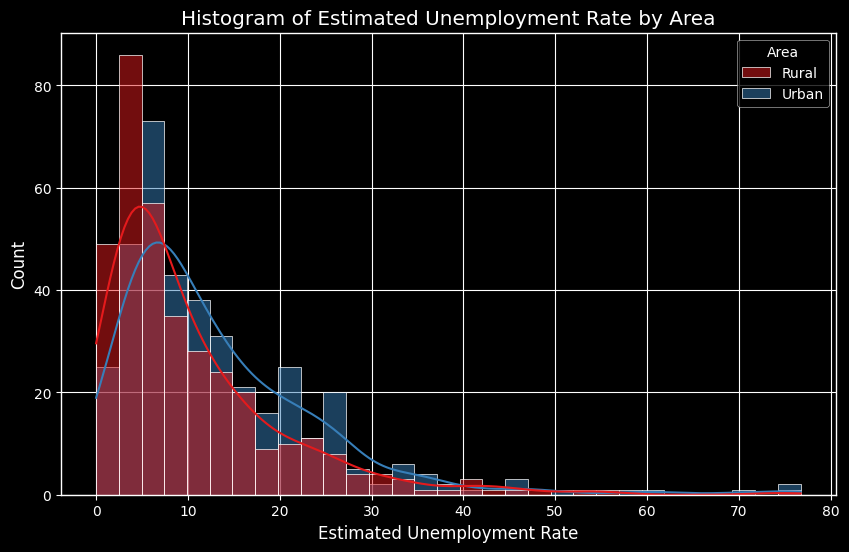

In [ ]:
plt.style.use("dark_background")

data.columns = ["Region", "Date", "Frequency", "Estimated Unemp Rate", "Estimated Emp Rate", "Estimated Labour Rate", "Area"]

plt.figure(figsize=(10, 6))
sns.histplot(x="Estimated Unemp Rate", hue="Area", data=data, kde=True, palette="Set1")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

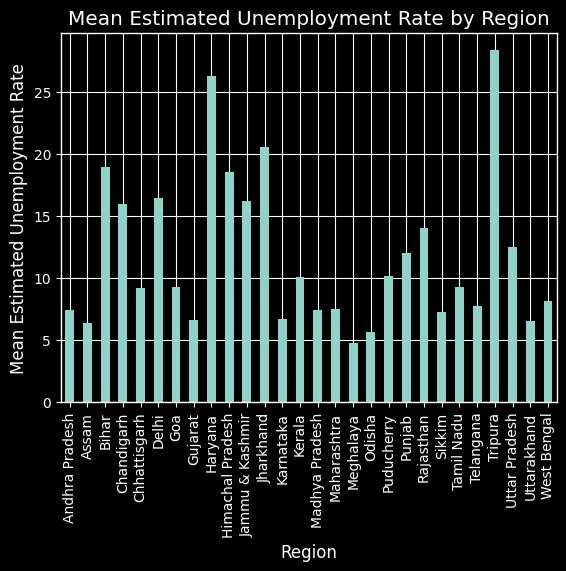

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = data[['Region', 'Estimated Unemp Rate']]
data_grouped = data.groupby('Region')['Estimated Unemp Rate'].mean()
data_grouped.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.show()

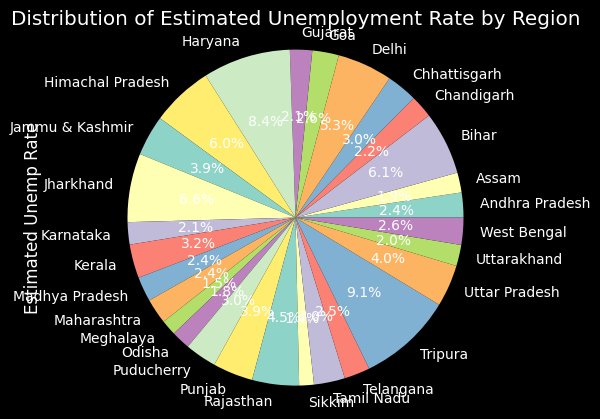

In [ ]:
data = data[['Region', 'Estimated Unemp Rate']]
data_grouped = data.groupby('Region')['Estimated Unemp Rate'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal')
plt.show()

In [ ]:
fig = px.bar(data, x='Region',y='Estimated Unemp Rate',animation_frame = 'Date',color='Region',
            title='Unemployment rate across region wrt date', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()